In [1]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions, emotion_colors, circle_fitting_and_regression
from module_behavioral.utility import set_significance
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau

In [2]:
## load emotion and color data from experiment three
d = DataLoader(context=3, location='../data/behavioral/processeddata/3/')
d.load_color()
d.load_emotion()
d.load_emotion_color_association()

In [3]:
## reduce the similarity matrix to 2 dimensions
color_embedding = reduce_dimensions(d.average_color_matrix, 2)
emotion_embedding = reduce_dimensions(d.average_emotion_matrix, 2)

In [4]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

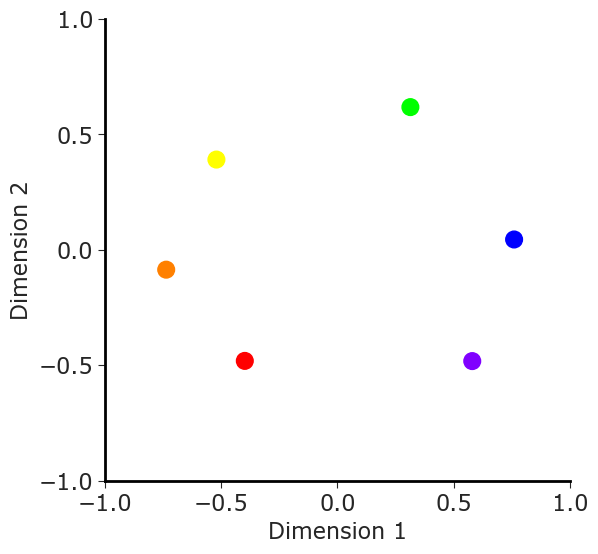

In [5]:
## Figure 4A.
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(color_embedding[:, 0], color_embedding[:, 1], c=d.color_values)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.locator_params(nbins=4)
plt.savefig('../figures/4A.svg', dpi=600,bbox_inches='tight')

In [6]:
emotion_colors = emotion_colors(color_embedding, d.average_emotion_color_ranking_matrix, d.color_values)

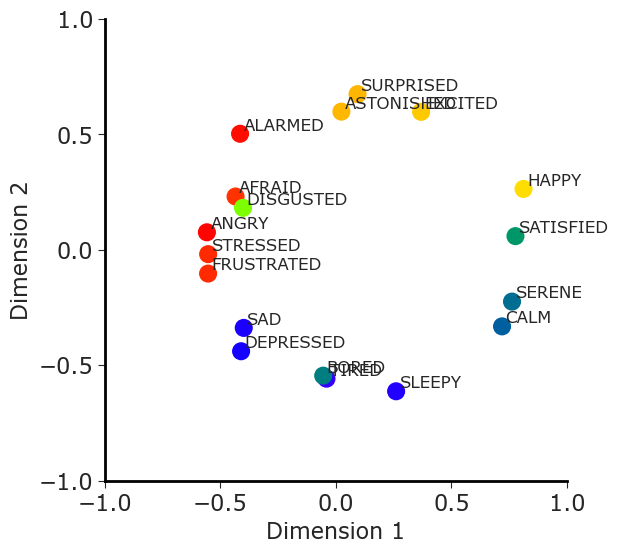

In [7]:
## Figure 4B.
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(emotion_embedding[:, 0], emotion_embedding[:, 1], c=emotion_colors)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

#annotate each point with emotion
ax.set_aspect('equal')

for i in range(0, len(d.emotion)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (emotion_embedding[i, 0], emotion_embedding[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=12)
plt.locator_params(nbins=4)
plt.savefig('../figures/4B.svg', dpi=600,bbox_inches='tight')

In [8]:
emotion_center, radius,  emotion_center_distances, color_center_distances, grey_center_distance = circle_fitting_and_regression(emotion_embedding, color_embedding, d.average_emotion_color_ranking_matrix, d.color_values)

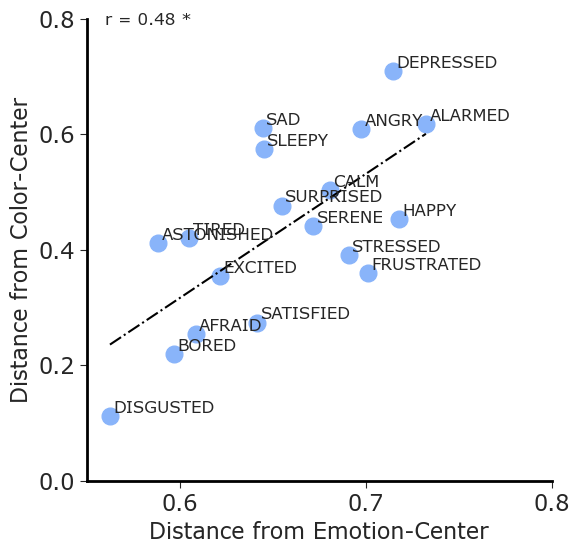

In [9]:
# FIG 4C

# fit a line
coef = np.polyfit(emotion_center_distances, color_center_distances, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(emotion_center_distances, color_center_distances)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_center_distances, color_center_distances)
plotx = np.linspace(np.min(emotion_center_distances),np.max(emotion_center_distances),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d.emotion)):

    x = d.emotion[i]

    plt.annotate(str(x),
                 (emotion_center_distances[i], color_center_distances[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=12)
ax.set_xlabel('Distance from Emotion-Center')
ax.set_ylabel('Distance from Color-Center')

ax.text(0.56,0.79,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_xlim([0.55, 0.8])
ax.set_ylim([0, 0.8])
plt.locator_params(nbins=4)

plt.savefig('../figures/4C.svg', dpi=600,bbox_inches='tight')